# GLOBAL POWER PLANT

# Step 1: Import Libraries

In [1]:
# Importing pandas for data manipulation
import pandas as pd

# Importing necessary modules from scikit-learn for preprocessing and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

# Step 2: Load the Dataset

In [4]:
# Reading the CSV file into a pandas DataFrame
df = pd.read_csv("database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 3: Data Visualization

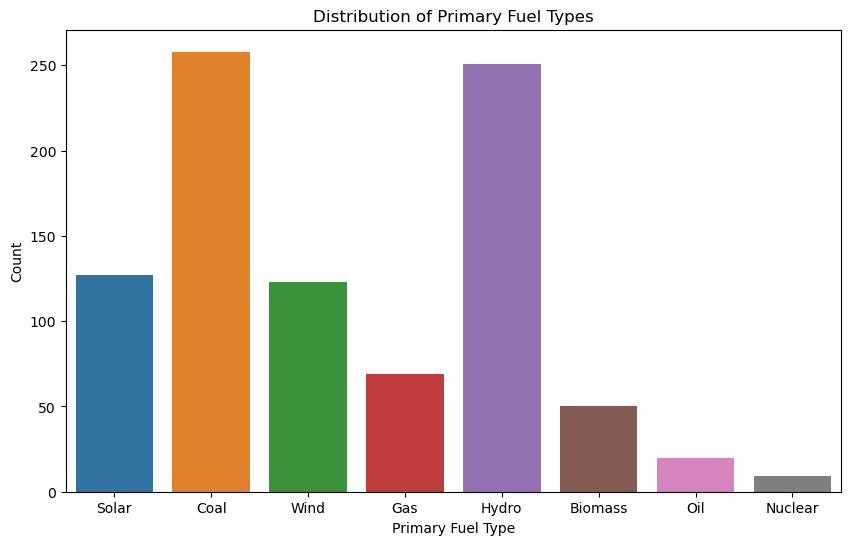

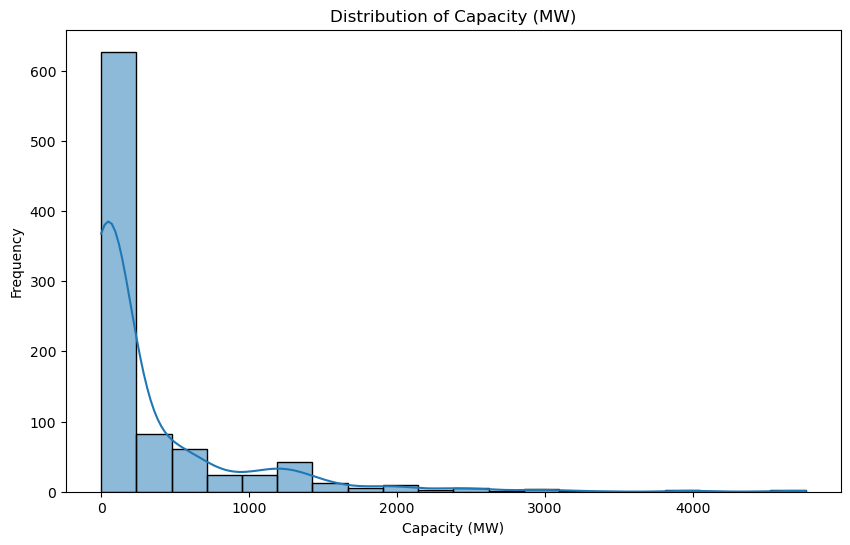

In [5]:

import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of primary fuel types
plt.figure(figsize=(10, 6))
sns.countplot(x='primary_fuel', data=df)
plt.title('Distribution of Primary Fuel Types')
plt.xlabel('Primary Fuel Type')
plt.ylabel('Count')
plt.show()

# Visualizing the distribution of capacity_mw
plt.figure(figsize=(10, 6))
sns.histplot(df['capacity_mw'], bins=20, kde=True)
plt.title('Distribution of Capacity (MW)')
plt.xlabel('Capacity (MW)')
plt.ylabel('Frequency')
plt.show()


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

# Step 4: Data Preprocessing

In [12]:

columns_to_drop = ['other_fuel2', 'other_fuel3', 'wepp_id', 'generation_gwh_2013',
                   'generation_gwh_2019', 'estimated_generation_gwh']

# Filtering the columns to drop that exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Dropping the selected columns
df = df.drop(columns=columns_to_drop)

df = df.dropna(subset=['latitude', 'longitude'])

df['commissioning_year'].fillna(df['commissioning_year'].median(), inplace=True)

label_encoder = LabelEncoder()
categorical_columns = ['country', 'country_long', 'name', 'gppd_idnr', 'other_fuel1', 'url', 'generation_data_source']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column].astype(str))
# Displaying the preprocessed DataFrame
print(df.head())

   country  country_long  name  gppd_idnr  capacity_mw  latitude  longitude  \
0        0             0     0        589          2.5   28.1839    73.2407   
1        0             0     1        437         98.0   24.7663    74.6090   
2        0             0   112        799         39.2   21.9038    69.3732   
3        0             0   223          0        135.0   23.8712    91.3602   
4        0             0   334          1       1800.0   21.9603    82.4091   

   primary_fuel  other_fuel1  commissioning_year  ...  source  url  \
0             6            3              2011.0  ...     109   31   
1             1            3              2001.0  ...     174   78   
2             7            3              2001.0  ...      21  108   
3             2            3              2004.0  ...      22  242   
4             1            2              2015.0  ...      22  242   

   geolocation_source  year_of_capacity_data  generation_gwh_2014  \
0                   1              

# Step 5: Split the Dataset

In [13]:

# Defining features (X) and target variables (y) for primary_fuel and capacity_mw predictions
X = df.drop(['primary_fuel', 'capacity_mw'], axis=1)
y_primary_fuel = df['primary_fuel']
y_capacity_mw = df['capacity_mw']

# Splitting the data into training and testing sets for primary_fuel prediction
X_train_pf, X_test_pf, y_train_pf, y_test_pf = train_test_split(
    X, y_primary_fuel, test_size=0.2, random_state=42
)

# Splitting the data into training and testing sets for capacity_mw prediction
X_train_cmw, X_test_cmw, y_train_cmw, y_test_cmw = train_test_split(
    X, y_capacity_mw, test_size=0.2, random_state=42
)

# Displaying the shapes of the training and testing sets
print("Shapes of Training and Testing Sets for Primary Fuel Prediction:")
print(X_train_pf.shape, y_train_pf.shape, X_test_pf.shape, y_test_pf.shape)

print("\nShapes of Training and Testing Sets for Capacity (MW) Prediction:")
print(X_train_cmw.shape, y_train_cmw.shape, X_test_cmw.shape, y_test_cmw.shape)


Shapes of Training and Testing Sets for Primary Fuel Prediction:
(688, 19) (688,) (173, 19) (173,)

Shapes of Training and Testing Sets for Capacity (MW) Prediction:
(688, 19) (688,) (173, 19) (173,)


# Step 6: Training Models

Accuracy for Primary Fuel Prediction: 0.8959537572254336
Mean Squared Error for Capacity (MW) Prediction: 80652.37353305984


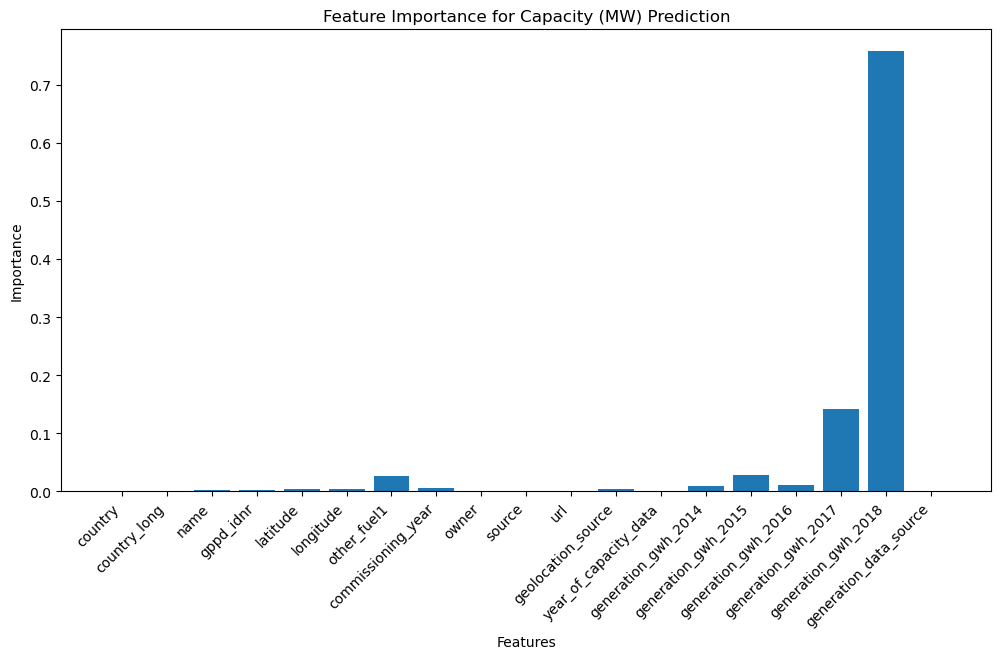

In [19]:
model_primary_fuel = XGBClassifier()
model_primary_fuel.fit(X_train_pf, y_train_pf)

model_capacity_mw = XGBRegressor()
model_capacity_mw.fit(X_train_cmw, y_train_cmw)

# Making Predictions
y_pred_pf = model_primary_fuel.predict(X_test_pf)
y_pred_cmw = model_capacity_mw.predict(X_test_cmw)

# Evaluating the Models
accuracy_pf = accuracy_score(y_test_pf, y_pred_pf)
mse_cmw = mean_squared_error(y_test_cmw, y_pred_cmw)

print(f'Accuracy for Primary Fuel Prediction: {accuracy_pf}')
print(f'Mean Squared Error for Capacity (MW) Prediction: {mse_cmw}')


# Plotting feature importance for the capacity_mw model
plt.figure(figsize=(12, 6))
plt.bar(X.columns, model_capacity_mw.feature_importances_)
plt.title('Feature Importance for Capacity (MW) Prediction')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

In [21]:
# Converting into percentage

print(f'Accuracy for XGBoost Primary Fuel Prediction: {accuracy_pf * 100:.2f}%')

Accuracy for XGBoost Primary Fuel Prediction: 89.60%


# step 5: Make Predictions:

In [23]:
# Making predictions for XGBoost models
y_pred_xgb_pf = model_xgb_primary_fuel.predict(X_test_pf)
y_pred_xgb_cmw = model_xgb_capacity_mw.predict(X_test_cmw)

# Printing some sample predictions for Primary Fuel
print("Sample Predictions for Primary Fuel:")
sample_predictions_pf = pd.DataFrame({'Actual': y_test_pf, 'Predicted': y_pred_xgb_pf})
print(sample_predictions_pf.head(10))

# Printing some sample predictions for Capacity (MW)
print("\nSample Predictions for Capacity (MW):")
sample_predictions_cmw = pd.DataFrame({'Actual': y_test_cmw, 'Predicted': y_pred_xgb_cmw})
print(sample_predictions_cmw.head(10))

Sample Predictions for Primary Fuel:
     Actual  Predicted
751       6          6
633       0          1
126       7          7
218       2          2
395       7          7
860       3          3
603       6          6
277       1          1
585       2          2
869       3          2

Sample Predictions for Capacity (MW):
     Actual    Predicted
751    5.00   123.181892
633   11.00    47.463596
126  150.00    49.667034
218  648.00   608.061340
395    6.00  1675.928345
860    3.75    69.596298
603    5.00    18.744350
277  350.00   600.534912
585  220.00   137.411407
869  460.00   369.104095


# Step 6: Evaluate the Models:

In [24]:
from sklearn.metrics import classification_report, mean_squared_error

# Evaluating XGBoost models
# For Primary Fuel Prediction
accuracy_xgb_pf = accuracy_score(y_test_pf, y_pred_xgb_pf)
classification_report_xgb_pf = classification_report(y_test_pf, y_pred_xgb_pf)

# For Capacity (MW) Prediction
rmse_xgb_cmw = mean_squared_error(y_test_cmw, y_pred_xgb_cmw, squared=False)  # Calculate RMSE

# Printing evaluation metrics for Primary Fuel Prediction
print(f'Accuracy for Primary Fuel Prediction: {accuracy_xgb_pf * 100:.2f}%')
print('Classification Report for Primary Fuel Prediction:')
print(classification_report_xgb_pf)

# Printing evaluation metrics for Capacity (MW) Prediction
print(f'\nRoot Mean Squared Error for Capacity (MW) Prediction: {rmse_xgb_cmw:.2f}')


Accuracy for Primary Fuel Prediction: 89.60%
Classification Report for Primary Fuel Prediction:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57        12
           1       0.88      0.91      0.89        46
           2       0.62      0.67      0.64        12
           3       0.94      0.96      0.95        52
           4       0.00      0.00      0.00         0
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        24

    accuracy                           0.90       173
   macro avg       0.76      0.69      0.72       173
weighted avg       0.90      0.90      0.89       173


Root Mean Squared Error for Capacity (MW) Prediction: 283.99


C:\Users\ACHINTYA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACHINTYA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACHINTYA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


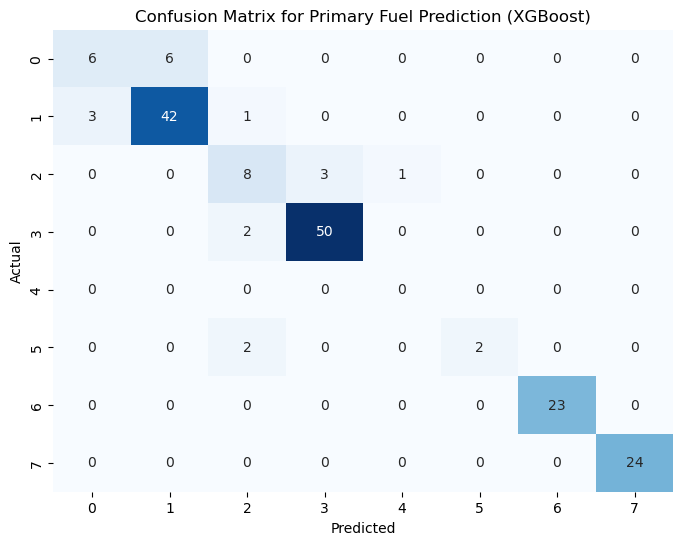

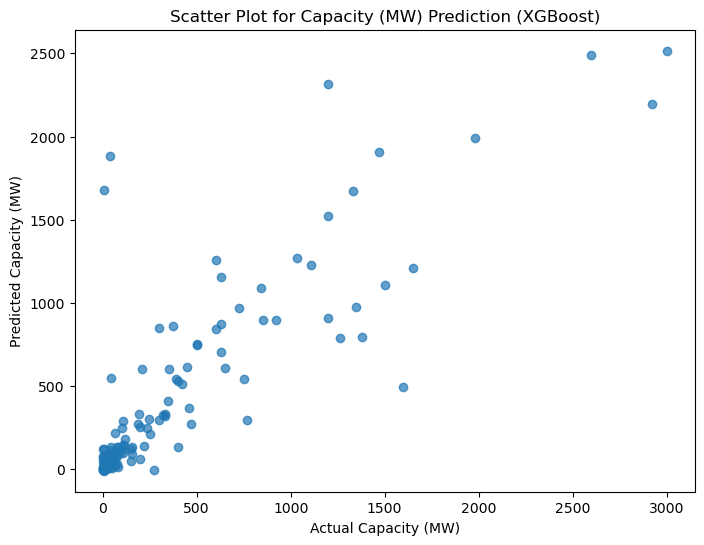

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plotting Confusion Matrix for Primary Fuel Prediction
cm_xgb_pf = confusion_matrix(y_test_pf, y_pred_xgb_pf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_pf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Primary Fuel Prediction (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting Scatter Plot for Capacity (MW) Prediction
plt.figure(figsize=(8, 6))
plt.scatter(y_test_cmw, y_pred_xgb_cmw, alpha=0.7)
plt.title('Scatter Plot for Capacity (MW) Prediction (XGBoost)')
plt.xlabel('Actual Capacity (MW)')
plt.ylabel('Predicted Capacity (MW)')
plt.show()
